# NB3.1 K Nearest Neighbors

K Nearest Neighbors (KNN) is a machine learning algorithm which uses the training dataset directly to make predictions.

In order to make prediction for new data points, KNN identifies the *k* most similar instances from the entire training set and summarizes the output variable for those *k* instances.

In classification, the predicted value is deternined by the majority class (mode) of the *k* most similar instances. For regression, it could be the mean of the output varible or a weighted mean where each neighbor contributes based on how close is to the new data point.

**NB3.1 K Nearest Neighbors** is divided in two sections:
* KNN Classifier. In this section you will implement KNN as classifier and use it to classify flowers from the Iris Dataset. 
* KNN Regresor. In this section you use the scikit-learn implementation of KNN as regressor to predict the value of Boston houses from the Boston House Pricing Dataset. 

Additionally, you will learn how to use the scikit-learn implementation of the algorithm.

## KNN Classifier

### A. Implementation

The implementation of the KNN Classifier of this activity will be done by using an Object Oriented Programming style. Consider the following structure:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

In [ ]:
class KNNClassifier:
    """
    <Include the description of the class here>
    
    Parameters:
    <Include the description of class parameters here>          
    
    
    Attributes:
    <Include the description of class attributes here>
    
    """
    def __init__(self, k = 3, distance = 'euclidean'):
        """
        <Include the description of the function here>
        
        Input:
        <Include the inputs of the function here>
        
        Output:
        <Include the outputs of the function here>
        """
        
        self.k = k
        self.distance = distance
        self.Xdata = None
        self.Ydata = None
    
    
    def fit(self, XTrain, YTrain):
        """
        <Include the description of the function here>
        
        Input:
        <Include the inputs of the function here>
        
        Output:
        <Include the outputs of the function here>
        """
        # this will assume the data is in numpy arrays
        self.Xdata = XTrain
        self.Ydata = YTrain
    
    def predict(self, XTest):
        """
        <Include the description of the function here>
        
        Input:
        <Include the inputs of the function here>
        
        Output:
        <Include the outputs of the function here>
        """
        # Your code should be here
        predicted_values=np.zeros((XTest.shape[0], 1))

        for i, Xrow in enumerate(XTest):
            Xrow = Xrow
            indexes = self._getNeighbors(Xrow) # Obtener los indices
            target_values = np.take(self.Ydata, indexes) # Take the elements corresponding to those indices
            prediction = np.bincount(target_values).argmax() # Contar y elegir el target mas frecuente
            predicted_values[i] = prediction
            
        return predicted_values # array de predicciones # array shape (n, )


    def _getNeighbors(self, Xrow):
        """
        <Compute the distance of Xrow to Xdata and gets their K nearest indexes>
        
        Input:
        <Xrow> A vector of shape (n, )
        
        Output:
        <K nearest indexes of Xdata to Xrow as an array>
        """
        # Compute distance
        if self.distance == 'euclidean':
          arr = self._EuclideanDistance(self.Xdata, Xrow)
        elif self.distance == 'manhattan':
          arr = self._ManhattanDistance(self.Xdata, Xrow)
        elif self.distance == 'chebyshev':
          arr = self._ChebyshevDistance(self.Xdata, Xrow)
        elif self.distance == 'cosine':
          arr = self._CosineSimilarity(self.Xdata, Xrow)
        else:
          return 'Enter a valid distance'

        # Get the smallest self.k indexes to Xrow 
        smallest_indexes = np.argpartition(arr,self.k)[:self.k] 

        return smallest_indexes # array shape (n, )
    
    def _EuclideanDistance(self, Xrow1, Xrow2):        
        """
        <L2 norm of a matrix of vectors>
              
        Input:
        <Xrow1> A matrix of X vectors
        <Xrow2> A vector
              
        Output:
        <Euclidean distance array> 
        """
        Xrow2 = Xrow2.reshape(1, -1)
        return np.linalg.norm(Xrow1 - Xrow2, axis=1, ord=2) # array shape (n, )
    
    def _ManhattanDistance(self, Xrow1, Xrow2):        
        """
        <L1 norm of a matrix of vectors>
              
        Input:
        <Xrow1> A matrix of X vectors
        <Xrow2> A vector
              
        Output:
        <Manhattan distance array> 
        """
        Xrow2 = Xrow2.reshape(1, -1)
        return np.linalg.norm(Xrow1 - Xrow2, axis=1, ord=1) # array shape (n, )
    
    def _ChebyshevDistance(self, Xrow1, Xrow2):        
        """
        <Inf norm of a matrix of vectors>
              
        Input:
        <Xrow1> A matrix of X vectors
        <Xrow2> A vector
              
        Output:
        <Chebyshev distance array>
        """
        # Your code should be here
        Xrow2 = Xrow2.reshape(1, -1)
        return np.linalg.norm(Xrow1 - Xrow2, axis=1, ord=np.inf) # array shape (n, )

    def _CosineSimilarity(self, Xrow1, Xrow2):        
        """
        <Inner product of the same vectors normalized to both have length>
        
        Input:
        <Xrow1> A matrix of X vectors
        <Xrow2> A vector
        
        Output:
        <CosineSimilarity distance array>
        """

        # Your code should be here
        Xrow2 = Xrow2.reshape(1, -1)
        return (np.dot(Xrow1, Xrow2.reshape(-1, 1)) / # numerator A.B
                (np.linalg.norm(Xrow1, axis=1).reshape(-1,1)*np.linalg.norm(Xrow2, axis=1))) # denominator ||A|||B|| # array shape (n, )

    def _HammingDistance(self, Xrow1, Xrow2):        
        """
        <Hamming distance of a matrix of vectors>
        
        Input:
        <Xrow1> A matrix of X vectors
        <Xrow2> A vector

        Output:
        <HammingDistance distance array>
        """
        # Your code should be here
        return np.count_nonzero(Xrow1!=Xrow2, axis=1).len(Xrow2)

        

Complete the following task by implementing the functions. You can create "private" methods and attributes.

**T1.** Complete the function `KNNClassifier.fit(self, XTrain, YTrain)`. The function should `XTrain` and `YTrain` into `self.XData` and `self.YData`, respectively. The function should not return any value.

**T2.** Complete the following functions which compute the distance metrics between two instances (`Xrow1`, `Xrow2`) by different approaches:
* `_EuclideanDistance(self, Xrow1, Xrow2` which computes the euclidean distance between Xrow1 and Xrow2.
* `_ManhattanDistance(self, Xrow1, Xrow2)` which computes the manhattan distance between Xrow1 and Xrow2.
* `_ChebyshevDistance(self, Xrow1, Xrow2)` which computes the chebishev distance between Xrow1 and Xrow2.
* `_CosineSimilarity(self, Xrow1, Xrow2)` which computes the cosine similarity between Xrow1 and Xrow2.
* `_HammingDistance(self, Xrow1, Xrow2)`which computes the hamming distance between Xrow1 and Xrow2.

**T3.** Complete the function `_getNeighbors(self, Xrow)` which should return the index of the `self.k` nearest neighbors to `Xrow`given the `self.distance` metric. Select the appropiate distance metric function to be used given the `self.distance`. Consider the following values: 'euclidean', 'manhattan', 'chebyshev', 'cosine', 'hamming'.

**T4.** Complete the function `predict(self, XTest)` which should return the predicted values for all instances in `XTest` according to `self.k` and `self.distance`.

### B. Iris Data

The Iris Dataset is one of the most known in the literature. This dataset has 50 instances of three different types of the plant Iris: Iris Versicolor, Iris Setosa and Iris Virginica (Fig. 1).

![IrisPlanta](./Images/Iris1.png)
*Figure 1. There are three types of the plant Iris: Versicolor, Setosa y Virginica. Image retrieved from [[1](https://www.datacamp.com/community/tutorials/machine-learning-in-r)]*

The attributes in the dataset are the length and width of the petal and sepal (Fig. 2).

![IrisPlanta](./Images/Iris2.png)
*Figura 2. Attributes in the Iris Dataset. Image R'retrieved from [[2](https://bishwamittra.github.io/imli.html)]*

The common goal is to predict the type of plant based on the features. One of the classes is linearly separable but the rest are not [[3](https://archive.ics.uci.edu/ml/datasets/iris)].

In [ ]:
iris = datasets.load_iris()
irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)
irisDF["target"] = iris.target

In [ ]:
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**T5.** In order to validate the implementation in *Part A*, some preprocessing steps are needed to improve the performance of the KNN Model. Complete the following.
* Use the StandardScaler (`sklearn.preprocessing.StandardScaler`) to standardize the features.
* Perform a stratified split of data (70% Train and 30% Test) into a Train and Test set. You can use `sklearn.model_selection.train_test_split`. Do not forget to set correctly the parameter `stratify`. You should split the data in a stratified way, using the target variable.

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# divide the data in training and testing sets
data_train, data_test, target_train, target_test = train_test_split(irisDF[iris.feature_names], 
                                                                    irisDF['target'].to_numpy(), 
                                                                    test_size=0.3, 
                                                                    stratify=irisDF['target'],
                                                                    random_state=0)
scaler = StandardScaler()
# fit the scaler to the training test only to avoid data leakage
scaler.fit(data_train)
# transform the data with the scaler
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

**T6.** Complete the following:
* Create a `KNNClassifier` with `k = 5` and `distance = 'euclidean'`.
* Fit the model with the trainning set.
* Predict the values of the test set.
* Create a new dataframe with the following columns: *y_real* and *y_predicted* for the test set.

In [ ]:
knn_c = KNNClassifier(k=5, distance='euclidean')

In [ ]:
knn_c.fit(data_train, target_train)

In [ ]:
new_dataframe = pd.DataFrame()
new_dataframe['y_real'] = target_test
new_dataframe['y_predicted'] = knn_c.predict(data_test)

In [ ]:
new_dataframe.head()

,y_real,y_predicted
0,2,2.0
1,2,2.0
2,0,0.0
3,0,0.0
4,1,1.0


The confusion matrix is one of the most common tools for the evaluation of classification models.

**T7.** Implement the functions `ConfusionMatrix(y_real, y_predicted)` and `Accuracy(y_real, y_predicted)`. The first function should return the confusion matrix given the predicted and real values of the target variable. The second function should return the accuracy given the predicted and real values of the target variable. Use your functions to evaluate the model obtained in **T6**.

In [ ]:
def ConfusionMatrix(y_real, y_predicted):
    """    
    <Also known as an error matrix, is a specific table layout that allows 
    visualization of the performance of an algorithm.>

    Input:
    <y_real is a pd.series or a np.array corresponding to the true values>
    <y_predicted is a pd.series or a np.array corresponding to the predicted values>  
    
    Output:
    <pd.DataFrame corresponding to the confusion matrix>
    """
    return pd.crosstab(y_real, y_predicted)

In [ ]:
def Accuracy(y_real, y_predicted):
    """    
    <Is closeness of the measurements to a specific value,
    (true positives + true negatives) / number of instances>
        
    Input:
    <y_real is a pd.series or a np.array corresponding to the true values>
    <y_predicted is a pd.series or a np.array corresponding to the predicted values>

    Output:
    <float corresponding to the value of accuracy>
    """
    confusion_matrix = ConfusionMatrix(y_real, y_predicted).to_numpy()
    trues_sum = np.diag(confusion_matrix).sum()
    return trues_sum / len(y_real)

**T8.** Make a plot of the *accuracy* as a function of k for different KNN models (k = [1,10]). Which is the most appropiate value of k?

Maximum accuracy:  0.9777777777777777 at K = 3


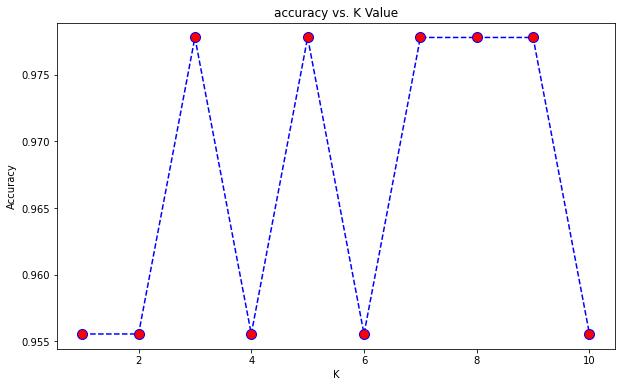

In [ ]:
acc = []
for i in range(1,11):
    neigh = KNNClassifier(k=i)
    neigh.fit(data_train, target_train)
    yhat = neigh.predict(data_test)
    acc.append(Accuracy(target_test, yhat.reshape(-1)))
    #print(ConfusionMatrix(target_test, yhat.reshape(-1)).values)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at K =",acc.index(max(acc))+1)

### C. Scikit-Learn KNNClassifier

Scikit-Learns implements a KNNClassifier Model [[4](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)] which learning is based on the *k* nearest neighbors of each query point, where *k* is an integer value to be specified by the user.

Here are some interesting parameters to consider during modelling creation:
* n_neighbors: Number of neighbors to use.
* weights: {'uniform', 'distance'}: Weight function used in prediction. Observe that when 'distance' is used, weight points by the inverse of their distance.
* algorithm: Algorithm used to compute the nearest neighbors. In the *part A*, it is probable that you implemented a brute-force search. 

**T9.** Complete the following modelling steps by using the datasets created in **T5** (`data_train`, `data_test`, `target_train`, `target_test`):
* Create a KNeighborsClassifier Model with 5 number of neighbors and 'distance' as the value of the `weights`parameter.
* Fit the data to the train set.
* Predict the values of the test set.
* Create a new dataframe with the following columns: *y_real* and *y_predicted* for the test set.
* Obtain the confusion matrics by using `metrics.confusion_matrix`[[5](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)]

In [ ]:
# Create your KNN model here
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [ ]:
# Fit the data to the train set here
neigh.fit(data_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
# Predict the values of the test set here
yhat = knn_c.predict(data_test)

In [ ]:
# Create a new dataframe with 'y_real' and 'y_predicted'
new_dataframe = pd.DataFrame()
new_dataframe['y_real'] = target_test
new_dataframe['y_predicted'] = yhat

In [ ]:
# Hand-made confusion matrix
confusion_matrix = ConfusionMatrix(new_dataframe['y_real'] , new_dataframe['y_predicted']).values
confusion_matrix

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

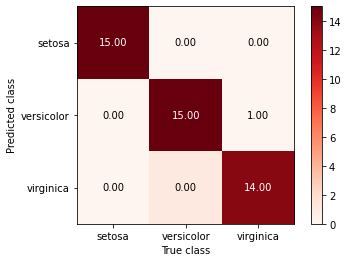

In [ ]:
# After obtaining the `confusion_matrix` in the las cell
# execute this cell to print it into a graphical way.

corr_im = plt.imshow(confusion_matrix, cmap="Reds", vmin=0)
corr_cbar = plt.colorbar(corr_im)

corr_array = corr_im.get_array()
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        cell_value = corr_array[i][j]
        if cell_value > 0.5*np.max(confusion_matrix):
            text_color = 'white'
        else:
            text_color = 'black'
        plt.text(i, j, '{:.2f}'.format(cell_value), color=text_color, ha='center', va='center')

plt.xticks(ticks=range(len(iris.target_names)), labels=iris.target_names)
plt.yticks(ticks=range(len(iris.target_names)), labels=iris.target_names)

plt.xlabel("True class")
plt.ylabel("Predicted class")
plt.show()

**T10.** Select the appropiate number of *k* by training and evaluating several KNeighborsClassifier Models. This time evaluate each model by using `sklearn.model_selection.cross_val_score` [[6](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)]. Use the accuracy to evaluate the model.

Print the confusion matrix and accuracy for a model trained with the best value of *k*.

In [ ]:
from sklearn.model_selection import cross_val_score


Maximum accuracy:  0.9733333333333334 at K = 9


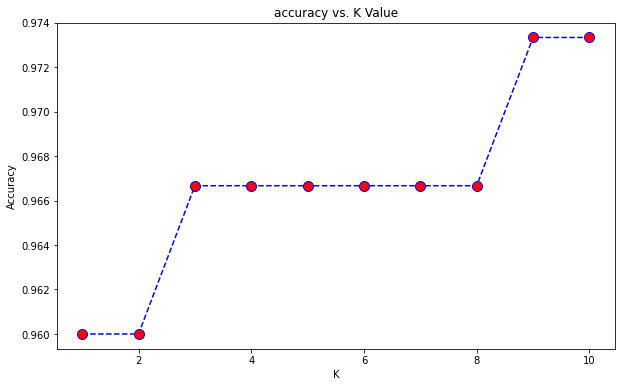

In [ ]:
acc = []
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=i, weights='distance')
    acc.append((cross_val_score(neigh, irisDF[iris.feature_names], irisDF['target'], cv=10, scoring='accuracy').mean()))
  
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at K =",acc.index(max(acc))+1)

In [ ]:
# Confussion Matrix using cross_val_predict over the entire dataset
from sklearn.model_selection import cross_val_predict

neigh = KNeighborsClassifier(n_neighbors=9, weights='distance')
yhat = cross_val_predict(neigh, irisDF[iris.feature_names], irisDF['target'], cv=10)

confusion_matrix = ConfusionMatrix(irisDF['target'],yhat)
confusion_matrix

col_0,0,1,2
target,,,
0,50,0,0
1,0,47,3
2,0,1,49


In [ ]:
# Accuracy of the model
print(Accuracy(irisDF['target'],yhat))

0.9733333333333334


In [ ]:
# Confussion Matrix using train/test split 
neigh = KNeighborsClassifier(n_neighbors=9, weights='distance')
neigh.fit(data_train, target_train)
yhat = neigh.predict(data_test)

confusion_matrix = ConfusionMatrix(target_test,yhat)
confusion_matrix

col_0,0,1,2
row_0,,,
0,15,0,0
1,0,15,0
2,0,1,14


In [ ]:
# Accuracy of the model
print(Accuracy(target_test,yhat))

0.9777777777777777


# KNN Regressor

Consider the Boston Housing Data [[7](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)]. It contains information collected by the U.S. Census Service concerning housing in the area of Boston Mass. 

In [ ]:
boston = datasets.load_boston()

In [ ]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF["PRICE"] = boston.target

In [ ]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Scikit-Learn implements a regressor based on k-nearest neighbors (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). The parameters of the model are similar to the one reviewed in the last section.

**T11.** In order to make the prediction of the , some preprocessing steps are needed to improve the performance of the KNN Model. Complete the following:
* Use the StandardScaler (`sklearn.preprocessing.StandardScaler`) to standardize the features.
* Perform a stratified split of data (70% Train and 30% Test) into a Train and Test set. You can use `sklearn.model_selection.train_test_split`.

In [ ]:
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target.reshape(-1, 1), test_size=0.30, random_state=0)

# X_train = scaler_T11.transform(X_train)
# X_test = scaler_T11.transform(X_test)

# It doesn't make sense to use a train/test split if we are going to evaluate with the whole datatet with cross-validation

X = StandardScaler().fit_transform(boston.data)
y = boston.target.reshape(-1,1)

**T12.** Fit the best KNeighborsRegressor considering `n_neighbors`and `weights`('uniform' and 'distance') as hyperparameters. Use cross validation (`cross_val_score`) to evaluate the model and RMSE as the evaluation metric.

Justify your selection by presenting two plots of 'RMSE' as a function of 'k'. One plot should correspond to models with 'uniform' weights and the second one with 'distance' weights.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
uniforms = []
distances = []

for k in range(1, 11): # check different values of k 
  krr_r_uniform = KNeighborsRegressor(n_neighbors=k, weights='uniform', n_jobs=-1)
  krr_r_distance = KNeighborsRegressor(n_neighbors=k, weights='distance', n_jobs=-1)

  rmse_u = -cross_val_score(krr_r_uniform, X, y, scoring='neg_root_mean_squared_error')
  rmse_d = -cross_val_score(krr_r_distance, X, y, scoring='neg_root_mean_squared_error')
  uniforms.append(rmse_u)
  distances.append(rmse_d)

In [ ]:
# list of lists to a 2-d array
unif = np.array(uniforms)
dist = np.array(distances)

# numpy array to pandas dataframe
df_unifs = pd.DataFrame(unif)
df_dist = pd.DataFrame(dist)

# because k started at 1, not at 0
df_unifs.index += 1
df_dist.index += 1

# to have the data in a nice looking ['k', 'rmse', 'type'] long format
df_uniforms = df_unifs.reset_index().melt(id_vars=['index']).drop('variable', axis=1)
df_uniforms.columns = ['k','rmse']
df_distances = df_dist.reset_index().melt(id_vars=['index']).drop('variable', axis=1)
df_distances.columns = ['k','rmse']


df_uniforms['type'] = 'uniform'
df_distances['type'] = 'distance'

# have all the data in a single dataframe
final = pd.concat([df_uniforms, df_distances])

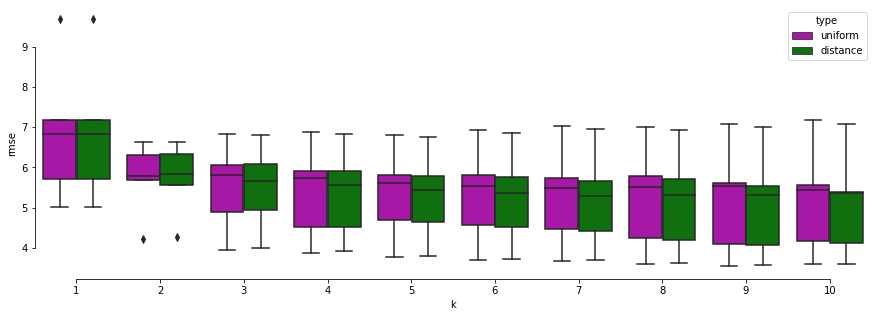

In [ ]:
import seaborn as sns

fig, ax = plt.subplots()

fig.set_size_inches(15, 5)
sns.boxplot(x="k", y="rmse",
            hue="type", palette=["m", "g"],
            data=final,
            ax=ax)
sns.despine(trim=True)

In [ ]:
"""
It is hard to tell which k is better.

As it can be seen in the graph, it didn't matter that much if the weights were uniform or based in distance, 
the performance was similar in both cases, and even tho the mean in some cases was better for one weight or the other,
their variance is almost the same in all the cases.

With that hyper-parameter out of the discussion, it could be said that bigger k gave better results in the rmse, until as 
k started to increase, the variable increased as well.

Because of that, it might be better to choose a k between 4 and 6, because the mean of the performance is similar to the other k's,
but has a smaller variance, which translates to having more consisting predictions.
""";

In [ ]:
# :)